In [2]:
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [31]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()

In [34]:
X = iris.data # feature matrix, note uppercase X as it a matrix
y = iris.target # response vector, hence lowercase y

In [35]:
k_range = range(1, 31)

In [36]:
# creating a parameter grid: map the parameter names to values to be searched
param_grid=dict(n_neighbors=list(k_range)) # added list to make a sequence
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [37]:
# instantiate grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1) # n_jobs=-1 allows
# parallel processing
# grid is an object ready to do 10 Fold cross-validation on a knn model using classification accuracy
# as the evaluation matrix. In addition it is going to pick n_neighbors from the list of param_grid
# so 30 times

In [46]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [48]:
return_train_score=True
grid.cv_results_

C:\Users\User\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\User\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\User\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\User\Anaconda\lib\site-packages\sklearn\utils\deprecat

{'mean_fit_time': array([ 0.00120008,  0.00050001,  0.00070009,  0.00040002,  0.00050001,
         0.00050001,  0.0006001 ,  0.00050006,  0.00040002,  0.00030003,
         0.00050001,  0.0006    ,  0.00050004,  0.00050004,  0.00030005,
         0.00080001,  0.00020001,  0.00030005,  0.00040004,  0.00040004,
         0.00040004,  0.00039997,  0.00050004,  0.00059998,  0.00060005,
         0.00019999,  0.00050004,  0.00040004,  0.00070002,  0.001     ]),
 'mean_score_time': array([ 0.00100002,  0.00090003,  0.001     ,  0.00070002,  0.00090003,
         0.00070007,  0.00070007,  0.00070007,  0.00090001,  0.00089996,
         0.00090003,  0.00090008,  0.00080001,  0.00080009,  0.00080009,
         0.00070007,  0.00100009,  0.00100009,  0.00090003,  0.00080001,
         0.00090008,  0.00090005,  0.0009001 ,  0.00080004,  0.00090008,
         0.00100005,  0.0006    ,  0.00130002,  0.00080006,  0.00080009]),
 'mean_test_score': array([ 0.96      ,  0.95333333,  0.96666667,  0.96666667,  0.96

In [52]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


In [3]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

C:\Users\User\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
iris = load_iris()

In [5]:
X = iris.data # feature matrix, note uppercase X as it a matrix
y = iris.target # response vector, hence lowercase y

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred))

0.973684210526


In [8]:
# simulate splitting the dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)
# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {!s:^25}'.format(iteration, data[0], data[1]))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


#### Cross-validation: parameter tuning for KNN

In [9]:
from sklearn.cross_validation import cross_val_score
# cross_val_score automatically splits the data into folds

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') # cv =10 means 10 Folds
# generally proven to be best
print(scores)
print(scores.mean())

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
0.966666666667


In [13]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


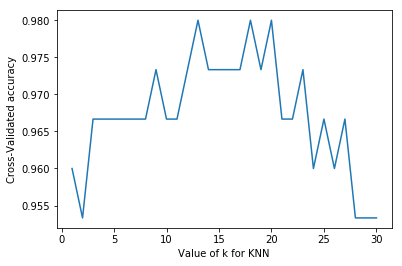

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated accuracy')
plt.show()
# looks like an inverted 'U'

#### Proof below that KNN is a better algo in this case compared to LogisticRegression, KNN offers more accuracy

In [16]:
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.98


In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.953333333333


### use different k

In [53]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X,y)
knn5_y_pred = knn5.predict(X)
knn5.predict(X_new)

array([1, 1])

### Use different classification model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)

In [48]:
logreg.predict(X_new)

array([2, 0])

### Model evaluation - whether Knn or LogisticRegression

In [49]:
# storing the prediction from logreg method for comparison
y_pred = logreg.predict(X)
len(y_pred)

150

In [50]:
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred)) # it will tell us 96% predictions were correct

0.96


In [54]:
print(metrics.accuracy_score(y,knn5_y_pred))

0.966666666667


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [57]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [59]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred = knn5.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


In [60]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [61]:
# try k = 1 to 25 and record testing accuracy
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

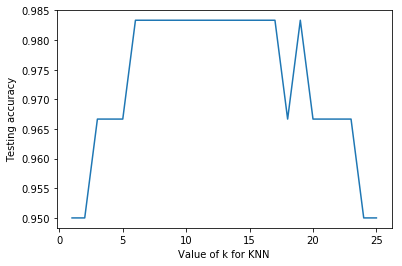

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing accuracy')
plt.show()

In [64]:
knn11 = KNeighborsClassifier(n_neighbors=11)
knn11.fit(X, y)
knn11.predict([[3,5,4,2]])

array([1])